In [3]:
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
%load_ext autoreload
%autoreload 2
import time
tag= 'tmp' + str(int(time.time()))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Courbes de taux de décharge en fonction des paramètres de sparseness

Les effets observés de la manipulation des poids des différentes projections génèrent des variations de flux d'activité entre les différentes populations du réseau. Mais ces flux ne dépendent pas seulement des poids synaptiques. Ils dépendent également du nombre de connexions existantes entre les populations.

Le simulateur utilisé permet de caractériser, de différentes manières, la façon de connecter les neurones de deux populations. Parmi les options proposées, se trouve un connecteur à probabilité fixe qui va connecter deux populations selon un paramètre de "sparseness". La "sparseness" est un paramètre définissant une probabilité de connexion synaptique entre les neurones de deux populations. Si la sparseness d'une projection est égale à 1, la projection est de type "all to all". Chaque projection possède donc un paramètre de "sparseness".

Ici, l'évolution du taux de décharge en fonction d'une variation de "sparseness" des différentes projections est étudiée. Ces analyses permettent d'apprécier la contribution de ces différents paramètres à l'activité.

Comme cela à pu être fait pour d'autres paramètres, une courbe de taux de décharge en fonction d'une variation de sparseness est générée pour chaque projection.

L'augmentation de la probabilité de connexion pour les projections EI et IE (latérales) provoque une diminution du taux de décharge. Alors que la même manipulation pour les projections EE et II (recurrentes) provoque une augmentation du taux de décharge. 

Les résultats sont similaires à ceux obtenus avec la variation des poids synaptiques, ce qui amène à considérer la modification de la "sparseness" ou des poids d'une même projection, comme une manière ou une autre de manipuler le flux d'activité entre les populations que cette projection relie.
C'est pourquoi dans la suite de ce projet, une manipulation du flux d'activité d'une population A à une autre population B sera implémentée simplement par une modification du poids de la projection AB.


------------  c_exc_inh  -------------


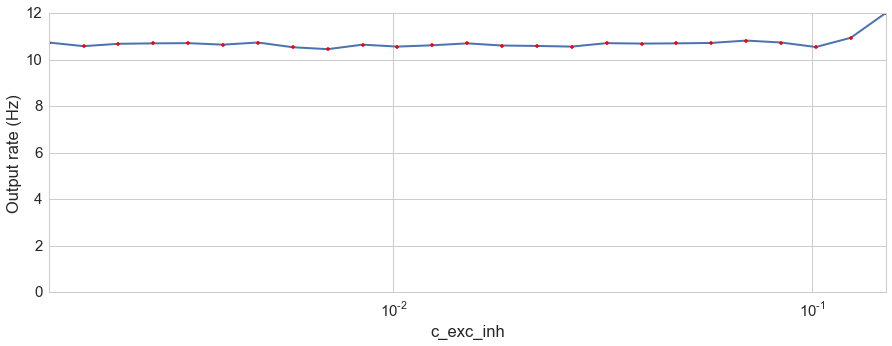

------------  c_inh_exc  -------------


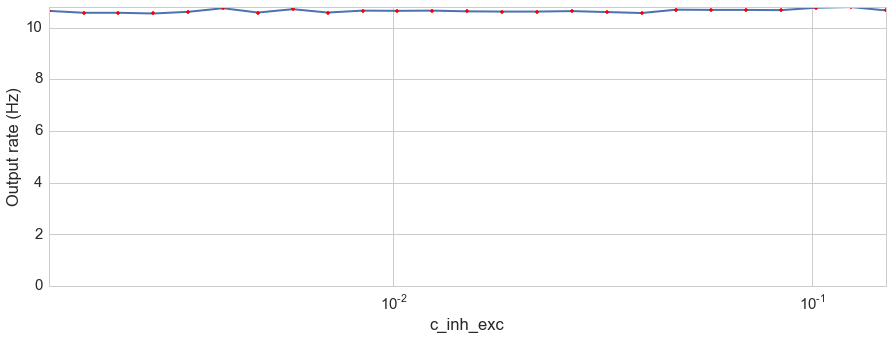

------------  c_exc_exc  -------------


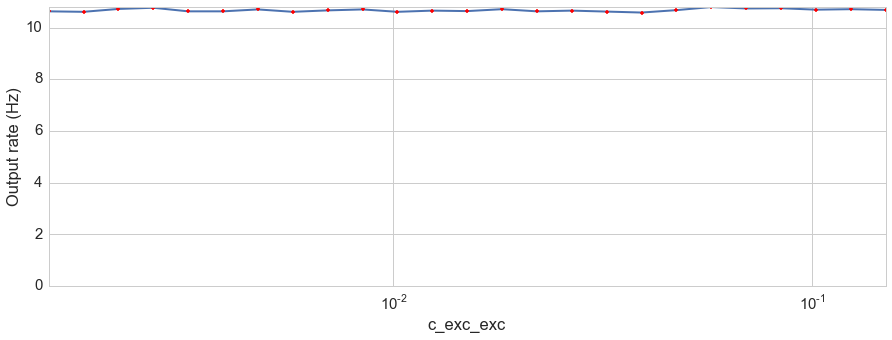

------------  c_inh_inh  -------------


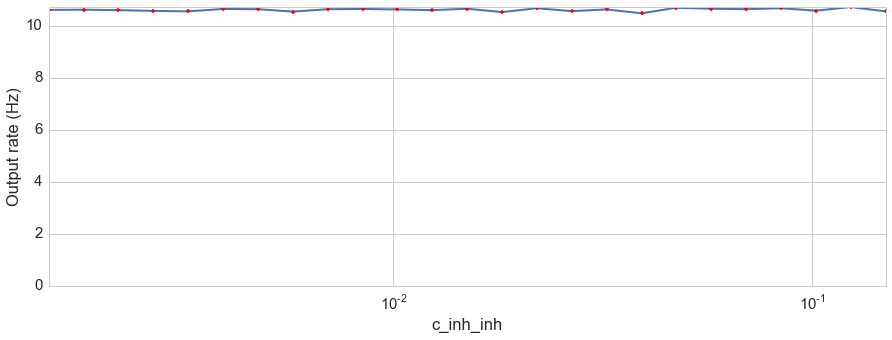

In [4]:
import numpy as np
n_sim_each, time = 25, 100
from RRNN import RRNN
net = RRNN(time = time, w=.3)

sim_params = net.sim_params
cell_params = net.cell_params
sim_list = [
            #('p' , sim_params['p'] * np.logspace(-.2, .2, n_sim_each)),
            ('c_exc_inh' , sim_params['c_exc_inh']*np.logspace(-1, 1, n_sim_each)),
            ('c_inh_exc' , sim_params['c_inh_exc']*np.logspace(-1, 1, n_sim_each)),
            ('c_exc_exc' , sim_params['c_exc_exc']*np.logspace(-1, 1, n_sim_each)),
            ('c_inh_inh' , sim_params['c_inh_inh']*np.logspace(-1, 1, n_sim_each))
]

net.paramRole(sim_list, f_rate_max=None, datapath='/tmp/RRNN_topo1' + tag)